## Baseline Scenario

#### Fixed Split:

- Bandwidth: 50% to user equipment, 50% to sensors
- Computational power: 50% to user equipment, 50% to sensors

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt

# predefined smart city scenario
from mobile_env.scenarios.smart_city import MComSmartCity

In [2]:
env = gym.make("mobile-smart_city-smart_city_handler-v0", render_mode="rgb_array")

print(f"\nSmart city environment with {env.NUM_USERS} users, {env.NUM_SENSORS} sensors and {env.NUM_STATIONS} cells.")


Smart city environment with 5 users, 20 sensors and 1 cells.


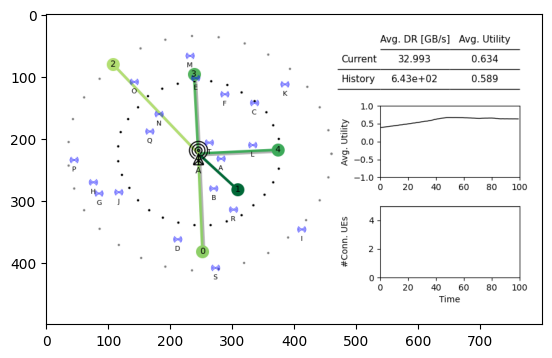

In [3]:
from IPython import display

# run the simulation for 20 time steps
done = False
obs, info = env.reset()

total_episode_reward = 0
total_reward_over_time = []  # List to store the reward at each time step

for _ in range(100):
    # here, use random dummy actions by sampling from the action space
    dummy_action = (0.50, 0.50)
    obs, reward, terminated, truncated, info = env.step(dummy_action)
    
    # accumulate total reward for the episode
    total_episode_reward += reward
    total_reward_over_time.append(total_episode_reward) 

    # render the environment
    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
    
plt.close()

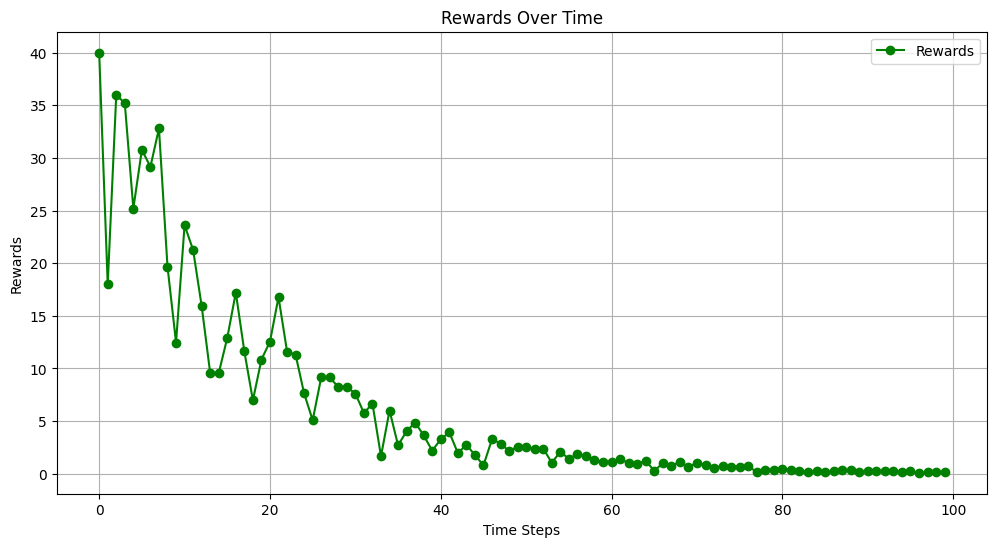

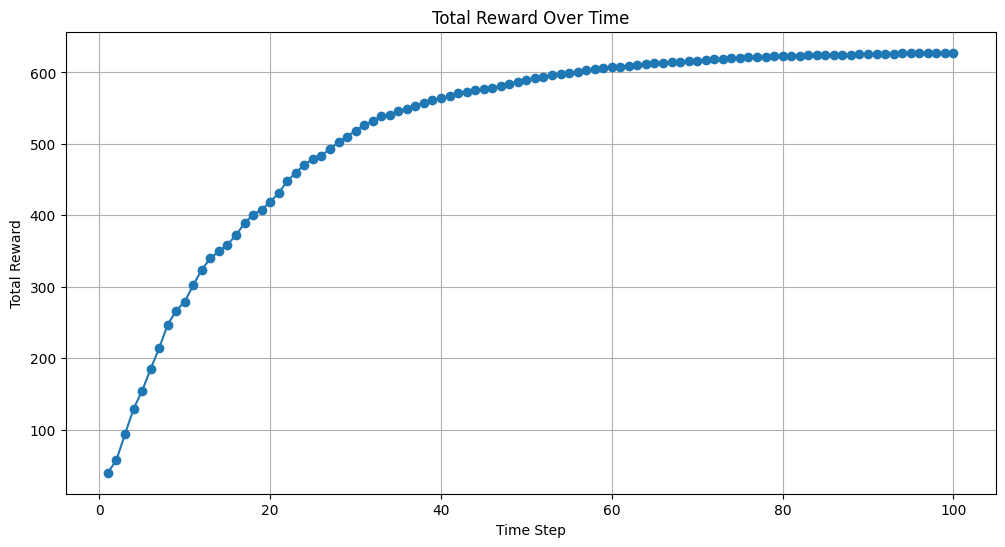

In [4]:
env.plot_rewards()
# Plot the reward over time
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(total_reward_over_time) + 1), total_reward_over_time, marker='o')
plt.title('Total Reward Over Time')
plt.xlabel('Time Step')
plt.ylabel('Total Reward')
plt.grid(True)
plt.show()

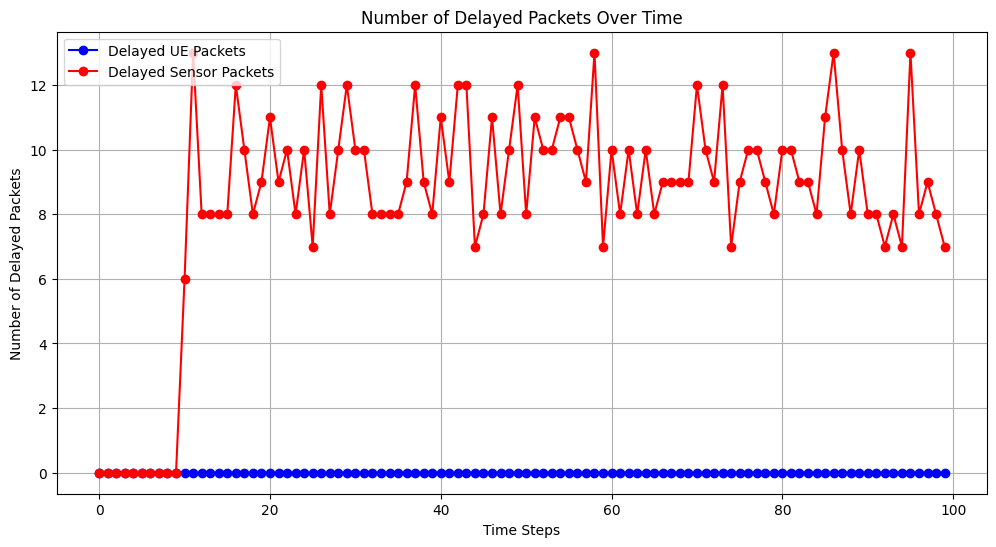

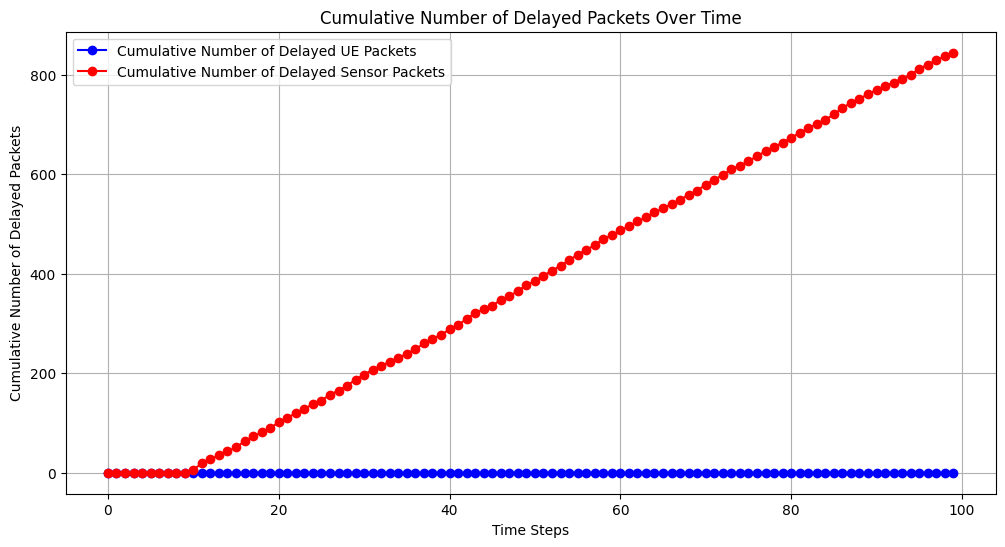

In [5]:
env.plot_delayed_packets()
env.plot_total_delayed_packets()

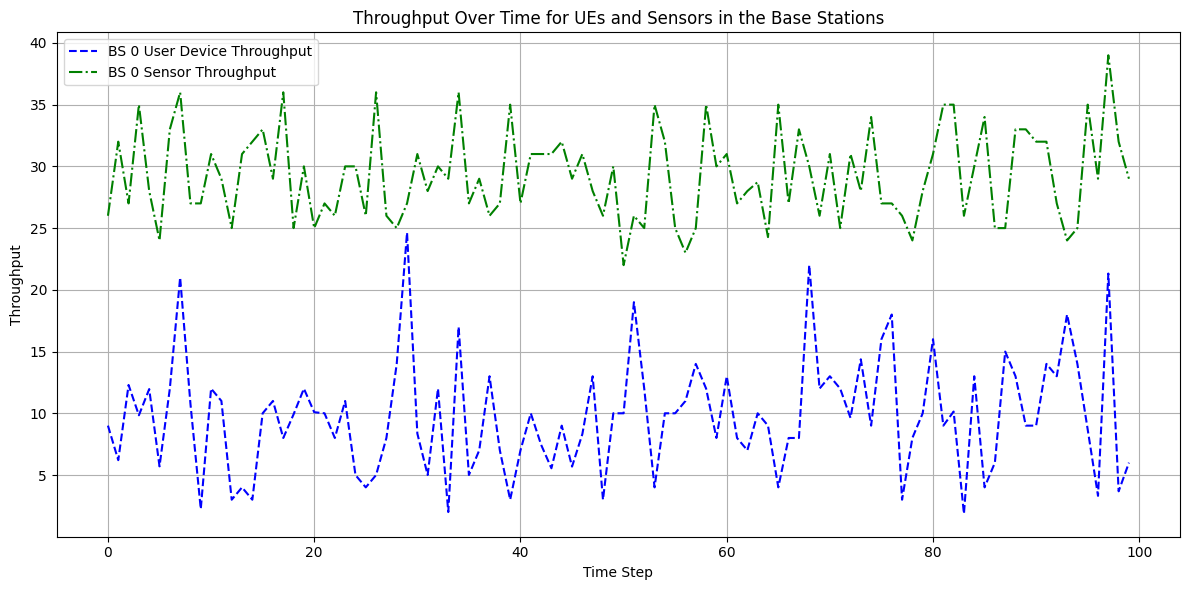

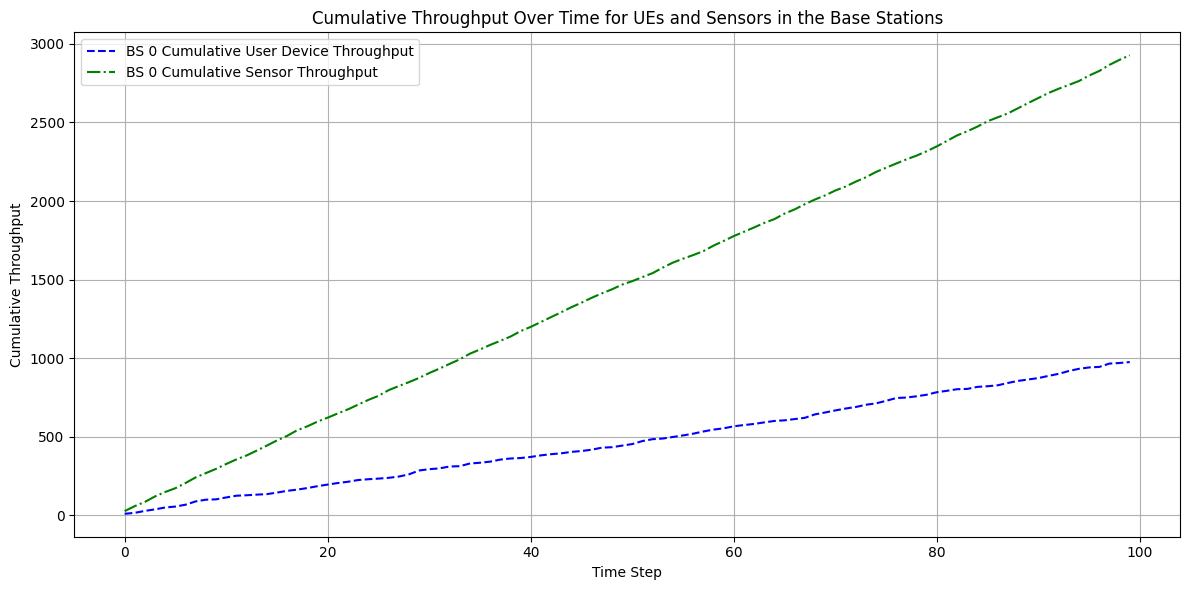

In [6]:
env.plot_throughput()
env.plot_cumulative_throughput()

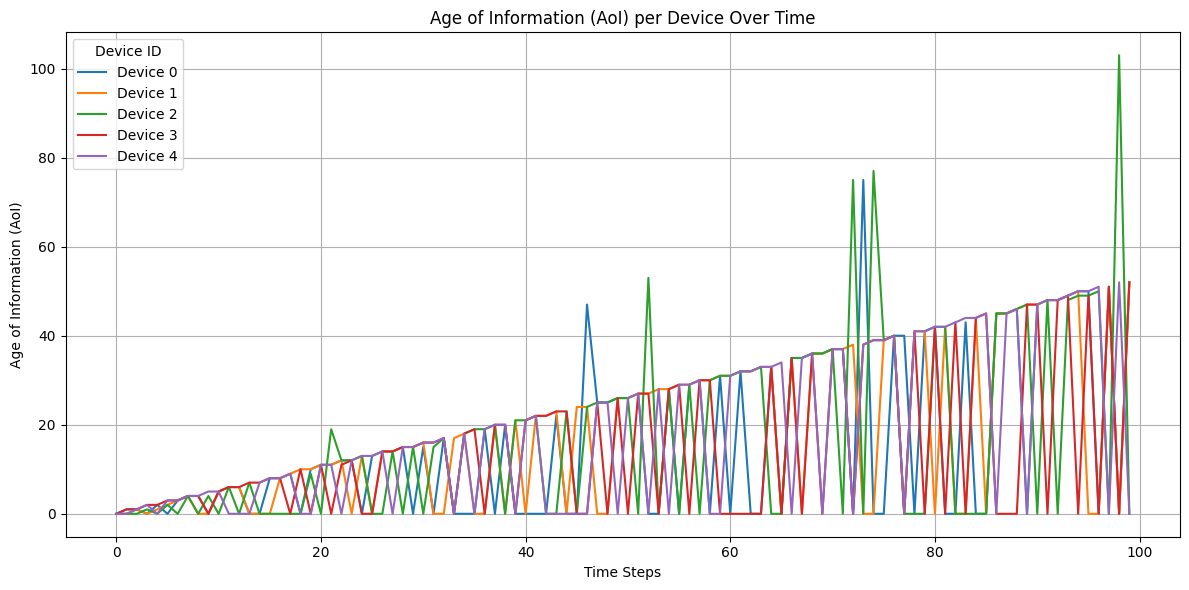

In [7]:
env.plot_aoi_per_device()

In [ ]:
num_episodes = 50
total_rewards_per_episode = []  # Store total reward at the end of each episode

for episode in range(num_episodes):
    
    obs, info = env.reset()  # Reset environment for each episode
    total_episode_reward = 0  # Reset total reward for this episode
    done = False

    # Run the episode until it's done
    while not done:
        # Use random dummy actions by sampling from the action space
        dummy_action = (0.50, 0.50)
        obs, reward, terminated, truncated, info = env.step(dummy_action)
        
        # Accumulate total reward for this episode
        total_episode_reward += reward

        # Check if the episode is over
        done = terminated or truncated
        
        # Render the environment (optional, can be removed if not needed)
        plt.imshow(env.render())
        display.display(plt.gcf())
        display.clear_output(wait=True)

    # Store the total reward for this episode
    total_rewards_per_episode.append(total_episode_reward)
    
    # Print a message at the end of each episode
    print(f"Episode {episode + 1} completed. Total Reward: {total_episode_reward}")

# Close the display after all episodes
plt.close()

In [ ]:
# Plot the total rewards at the end of each episode
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_episodes + 1), total_rewards_per_episode, marker='o', color='b', label="Total Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward at the End of Each Episode")
plt.legend()
plt.grid(True)
plt.show()